# Recurrent Neural Networks

calcular o preço das ações Da empresa do google

### Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importando Dataset

In [5]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

### Criando e treinando a rede

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

regressor.add(GRU(units = 50, return_sequences = True))

regressor.add(GRU(units = 50, return_sequences = True))

regressor.add(GRU(units = 50, return_sequences = True))

regressor.add(GRU(units = 50))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [9]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 12s 96ms/step - loss: 0.0822
Epoch 2/10
38/38 [==============================] - 4s 101ms/step - loss: 0.0018
Epoch 3/10
38/38 [==============================] - 4s 100ms/step - loss: 0.0012
Epoch 4/10
38/38 [==============================] - 3s 88ms/step - loss: 9.5685e-04
Epoch 5/10
38/38 [==============================] - 4s 97ms/step - loss: 8.8808e-04
Epoch 6/10
38/38 [==============================] - 4s 109ms/step - loss: 7.7531e-04
Epoch 7/10
38/38 [==============================] - 4s 113ms/step - loss: 7.0580e-04
Epoch 8/10
38/38 [==============================] - 4s 106ms/step - loss: 7.4601e-04
Epoch 9/10
38/38 [==============================] - 4s 112ms/step - loss: 6.3140e-04
Epoch 10/10
38/38 [==============================] - 4s 112ms/step - loss: 7.5566e-04


In [10]:

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

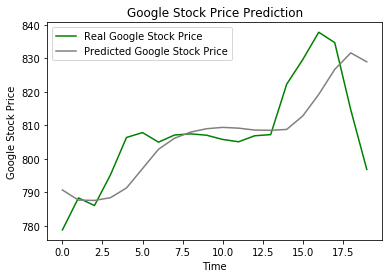

In [11]:
plt.plot(real_stock_price, color = 'green', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'grey', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## FIM